In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, unix_timestamp, from_unixtime
from pyspark.sql import functions as F
from pyspark import SparkFiles

# let's begin by creating the spark context
# we can reuse this later
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext('local')
spark = SparkSession(sc)

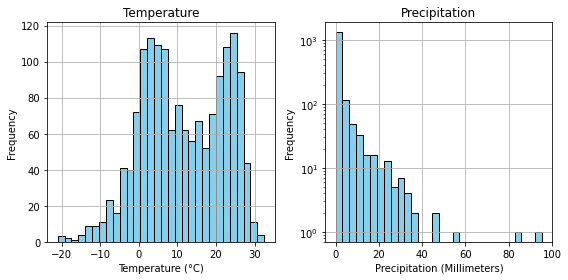

In [3]:
import matplotlib.pyplot as plt

# load csv file with weather data
weather_data = spark.read.csv('weather_2020_onwards.csv', header=True, inferSchema=True)

# collect the data for the two plots
temp_data = weather_data.select('temp').dropna().rdd.flatMap(lambda x: x).collect()
precip_data = weather_data.select('precip').dropna().filter(F.col('precip') < 100).rdd.flatMap(lambda x: x).collect()

# make the plots
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].hist(temp_data, bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('Temperature')
axes[0].set_xlabel('Temperature (°C)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True)
axes[1].hist(precip_data, bins=30, color='skyblue', edgecolor='black')
axes[1].set_title('Precipitation')
axes[1].set_xlabel('Precipitation (Millimeters)')
axes[1].set_ylabel('Frequency')
axes[1].set_yscale('log')
axes[1].grid(True)
plt.tight_layout()
plt.show()